In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from msumastro import ImageFileCollection, TableTree

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
import glob
import ccdproc
import tarfile
if ('wolf1346 (1).tar.gz'.endswith("tar.gz")):
    tar = tarfile.open('wolf1346 (1).tar.gz', "r:gz")
    tar.extractall()
    tar.close()

In [2]:
gain = 1.47 * u.electron / u.adu
readnoise = 29 * u.electron

In [3]:
bias_list =glob.glob('/users/allyw/Astro 480/ResearchProject/Bias*.fits')


In [4]:
image_data_list=[]
for bias_file in bias_list:
    image_data = fits.getdata(bias_file)
    image_data_list.append(image_data)
    print(bias_file, np.mean(image_data))

/users/allyw/Astro 480/ResearchProject\Bias_BIN1_20190506_021550.fits 1309.5129508972168
/users/allyw/Astro 480/ResearchProject\Bias_BIN1_20190506_021556.fits 1309.501971244812
/users/allyw/Astro 480/ResearchProject\Bias_BIN1_20190506_021602.fits 1309.4899234771729
/users/allyw/Astro 480/ResearchProject\Bias_BIN1_20190506_021607.fits 1309.5117416381836
/users/allyw/Astro 480/ResearchProject\Bias_BIN1_20190506_021611.fits 1309.5222940444946
/users/allyw/Astro 480/ResearchProject\Bias_BIN1_20190506_021616.fits 1309.5177431106567
/users/allyw/Astro 480/ResearchProject\Bias_BIN1_20190506_021621.fits 1309.5232257843018
/users/allyw/Astro 480/ResearchProject\Bias_BIN1_20190506_021625.fits 1309.525149345398
/users/allyw/Astro 480/ResearchProject\Bias_BIN1_20190506_021629.fits 1309.5222692489624
/users/allyw/Astro 480/ResearchProject\Bias_BIN1_20190506_021635.fits 1309.509301185608
/users/allyw/Astro 480/ResearchProject\Bias_BIN1_20190506_021640.fits 1309.5277824401855
/users/allyw/Astro 480/R

In [5]:
master_bias = np.median(image_data_list, axis = 0)

In [6]:
np.median(master_bias)

1309.5

In [7]:
u_flat = glob.glob('/users/allyw/Astro 480/ResearchProject/skyflat_sdss_u_001.fits') 
g_flat = glob.glob('/users/allyw/Astro 480/ResearchProject/skyflat_sdss_g_001.fits')
r_flat = glob.glob('/users/allyw/Astro 480/ResearchProject/skyflat_sdss_r_001.fits')
i_flat = glob.glob('/users/allyw/Astro 480/ResearchProject/skyflat_sdss_i_001.fits')
z_flat = glob.glob('/users/allyw/Astro 480/ResearchProject/skyflat_sdss_z_001.fits')
h_flat = glob.glob('/users/allyw/Astro 480/ResearchProject/skyflat_halpha_001.fits')

In [8]:
u_flat_list=[]
for flat_file in u_flat:
    image_data = fits.getdata(flat_file)
    u_flat_list.append(image_data)
    print(flat_file, np.mean(image_data))

/users/allyw/Astro 480/ResearchProject/skyflat_sdss_u_001.fits 30815.732138633728


In [9]:
g_flat_list=[]
for flat_file in g_flat:
    image_data = fits.getdata(flat_file)
    g_flat_list.append(image_data)
    print(flat_file, np.mean(image_data))

/users/allyw/Astro 480/ResearchProject/skyflat_sdss_g_001.fits 28768.90833568573


In [10]:
r_flat_list=[]
for flat_file in r_flat:
    image_data = fits.getdata(flat_file)
    r_flat_list.append(image_data)
    print(flat_file, np.mean(image_data))

/users/allyw/Astro 480/ResearchProject/skyflat_sdss_r_001.fits 18463.63752746582


In [11]:
i_flat_list=[]
for flat_file in i_flat:
    image_data = fits.getdata(flat_file)
    i_flat_list.append(image_data)
    print(flat_file, np.mean(image_data))

/users/allyw/Astro 480/ResearchProject/skyflat_sdss_i_001.fits 18504.045983314514


In [12]:
z_flat_list=[]
for flat_file in z_flat:
    image_data = fits.getdata(flat_file)
    z_flat_list.append(image_data)
    print(flat_file, np.mean(image_data))

/users/allyw/Astro 480/ResearchProject/skyflat_sdss_z_001.fits 18088.984580993652


In [13]:
h_flat_list=[]
for flat_file in h_flat:
    image_data = fits.getdata(flat_file)
    h_flat_list.append(image_data)
    print(flat_file, np.mean(image_data))

/users/allyw/Astro 480/ResearchProject/skyflat_halpha_001.fits 15015.34829044342


In [14]:
M82h = glob.glob('/users/allyw/Astro 480/ResearchProject/M82_halpha_20190502_045653.fits')
M82u = glob.glob('/users/allyw/Astro 480/ResearchProject/M82_sdss_u_20190502_050824.fits')
M82g = glob.glob('/users/allyw/Astro 480/ResearchProject/M82_sdss_g_20190502_052242.fits')
M82r = glob.glob('/users/allyw/Astro 480/ResearchProject/M82_sdss_r_20190501_050012.fits')
M82r2 = glob.glob('/users/allyw/Astro 480/ResearchProject/M82_sdss_r_20190502_045222.fits')
M82i = glob.glob('/users/allyw/Astro 480/ResearchProject/M82_sdss_i_20190502_052656.fits')
M82z = glob.glob('/users/allyw/Astro 480/ResearchProject/M82_sdss_z_20190502_053302.fits')

In [15]:
for M82u_file in M82u:
    calibrated_m82u = M82u_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M82u_file) - master_bias)/(np.median(u_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M82u_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m82u, overwrite=True)

In [16]:
for M82r_file in M82r:
    calibrated_m82r = M82r_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M82r_file) - master_bias)/(np.median(r_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M82r_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m82r, overwrite=True)

In [17]:
for M82g_file in M82g:
    calibrated_m82g = M82g_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M82g_file) - master_bias)/(np.median(g_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M82g_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m82g, overwrite=True)

In [18]:
for M82r2_file in M82r2:
    calibrated_m82r2 = M82r2_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M82r2_file) - master_bias)/(np.median(r_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M82r2_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m82r2, overwrite=True)

In [19]:
for M82h_file in M82h:
    calibrated_m82h = M82h_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M82h_file) - master_bias)/(np.median(h_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M82h_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m82h, overwrite=True)

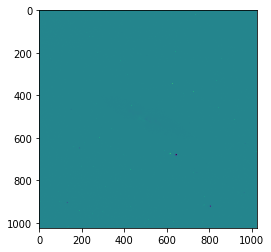

In [20]:
StarformM82 = fits.getdata(calibrated_m82h) - fits.getdata(calibrated_m82r)
plt.imshow(StarformM82)

In [21]:
hdu = fits.PrimaryHDU(StarformM82) 
fits.writeto('StarformM82.fits',StarformM82, overwrite = True)

In [22]:
M3h = glob.glob('/users/allyw/Astro 480/ResearchProject/M3_halpha_20190501_092948.fits')
M3u = glob.glob('/users/allyw/Astro 480/ResearchProject/M3_sdss_u_20190501_092006.fits')
M3g = glob.glob('/users/allyw/Astro 480/ResearchProject/M3_sdss_g_20190501_085824.fits')
M3r = glob.glob('/users/allyw/Astro 480/ResearchProject/M3_sdss_r_20190501_091345.fits')
#M3 = glob.glob('/users/allyw/Astro 480/ResearchProject/M82_sdss_r_20190502_045222.fits')
M3i = glob.glob('/users/allyw/Astro 480/ResearchProject/M3_sdss_i_20190501_090302.fits')
M3z = glob.glob('/users/allyw/Astro 480/ResearchProject/M3_sdss_z_20190501_090826.fits')

In [23]:
for M3r_file in M3r:
    calibrated_m3r = M3r_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M3r_file) - master_bias)/(np.median(r_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M3r_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m3r, overwrite=True)

In [24]:
for M3g_file in M3g:
    calibrated_m3gg = M3g_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M3g_file) - master_bias)/(np.median(g_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M3g_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m3gg, overwrite=True)

In [25]:
for M3z_file in M3z:
    calibrated_m3z = M3z_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M3z_file) - master_bias)/(np.median(z_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M3z_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m3z, overwrite=True)

In [26]:
for M3h_file in M3h:
    calibrated_m3h = M3h_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M3h_file) - master_bias)/(np.median(h_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M3h_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m3h, overwrite=True)

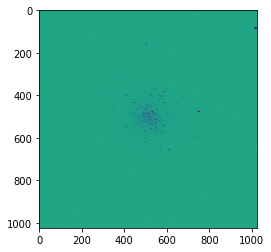

In [27]:
StarformM3 = fits.getdata(calibrated_m3h) - fits.getdata(calibrated_m3r)
plt.imshow(StarformM3)

In [28]:

hdu = fits.PrimaryHDU(StarformM3) 
fits.writeto('StarformM3.fits',StarformM3, overwrite = True)

In [29]:
M87h = glob.glob('/users/allyw/Astro 480/ResearchProject/M87_halpha_20190502_054733.fits')
M87u = glob.glob('/users/allyw/Astro 480/ResearchProject/M87_sdss_u_20190502_055541.fits')
M87g = glob.glob('/users/allyw/Astro 480/ResearchProject/M87_sdss_g_20190502_061411.fits')
M87r = glob.glob('/users/allyw/Astro 480/ResearchProject/M87_sdss_r_20190502_054039.fits')
#M87i = glob.glob('/users/allyw/Astro 480/ResearchProject/M3_sdss_i_20190501_090302.fits')
#M87z = glob.glob('/users/allyw/Astro 480/ResearchProject/M3_sdss_z_20190501_090826.fits')

In [30]:
for M87r_file in M87r:
    calibrated_m87r = M87r_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M87r_file) - master_bias)/(np.median(r_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M87r_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m87r, overwrite=True)

In [31]:
for M87g_file in M87g:
    calibrated_m87g = M87g_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M87g_file) - master_bias)/(np.median(g_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M87g_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m87g, overwrite=True)

In [32]:
for M87u_file in M87u:
    calibrated_m87u = M87u_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M87u_file) - master_bias)/(np.median(u_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M87u_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m87u, overwrite=True)

In [33]:
for M87h_file in M87h:
    calibrated_m87h = M87h_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M87h_file) - master_bias)/(np.median(h_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M87h_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m87h, overwrite=True)

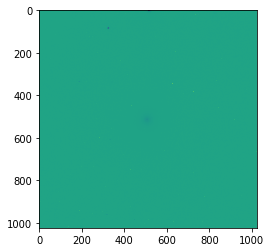

In [34]:
StarformM87 = fits.getdata(calibrated_m87h) - fits.getdata(calibrated_m87r)
plt.imshow(StarformM87)

In [35]:
hdu = fits.PrimaryHDU(StarformM87)
fits.writeto('StarformM87.fits',StarformM87, overwrite = True)

In [36]:
NGC6791h = glob.glob('/users/allyw/Astro 480/ResearchProject/NGC6791_halpha_20190502_082011.fits')
NGC6791u = glob.glob('/users/allyw/Astro 480/ResearchProject/NGC6791_sdss_u_20190502_082519.fits')
NGC6791g = glob.glob('/users/allyw/Astro 480/ResearchProject/NGC6791_sdss_g_20190502_081732.fits')
NGC6791r = glob.glob('/users/allyw/Astro 480/ResearchProject/NGC6791_sdss_r_20190502_083041.fits')

In [37]:
for NGC6791r_file in NGC6791r:
    calibrated_ngc6791r = NGC6791r_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(NGC6791r_file) - master_bias)/(np.median(r_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(NGC6791r_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_ngc6791r, overwrite=True)

In [38]:
for NGC6791g_file in NGC6791g:
    calibrated_ngc6791g = NGC6791g_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(NGC6791g_file) - master_bias)/(np.median(g_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(NGC6791g_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_ngc6791g, overwrite=True)

In [39]:
for NGC6791u_file in NGC6791u:
    calibrated_ngc6791u = NGC6791u_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(NGC6791u_file) - master_bias)/(np.median(u_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(NGC6791u_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_ngc6791u, overwrite=True)

In [40]:
for NGC6791h_file in NGC6791h:
    calibrated_ngc6791h = NGC6791h_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(NGC6791h_file) - master_bias)/(np.median(h_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(NGC6791h_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_ngc6791h, overwrite=True)

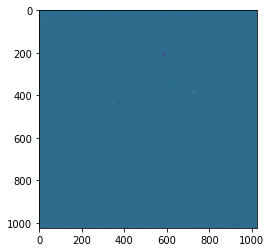

In [41]:
StarformNGC6791 = fits.getdata(calibrated_ngc6791h) - fits.getdata(calibrated_ngc6791r)
plt.imshow(StarformNGC6791)

In [42]:
hdu = fits.PrimaryHDU(StarformNGC6791)
fits.writeto('StarformNGC6791.fits',StarformNGC6791, overwrite = True)

In [43]:
M51h = glob.glob('/users/allyw/Astro 480/ResearchProject/M51_halpha_20190501_083356.fits')
M51u = glob.glob('/users/allyw/Astro 480/ResearchProject/M51_sdss_u_20190501_084159.fits')
M51g = glob.glob('/users/allyw/Astro 480/ResearchProject/M51_sdss_g_20190501_081040.fits')
M51r = glob.glob('/users/allyw/Astro 480/ResearchProject/M51_sdss_r_20190501_082651.fits')

In [44]:
for M51r_file in M51r:
    calibrated_m51r = M51r_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M51r_file) - master_bias)/(np.median(r_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M51r_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m51r, overwrite=True)

In [45]:
for M51g_file in M51g:
    calibrated_m51g = M51g_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M51g_file) - master_bias)/(np.median(g_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M51g_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m51g, overwrite=True)

In [46]:
for M51u_file in M51u:
    calibrated_m51u = M51u_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M51u_file) - master_bias)/(np.median(u_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M51u_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m51u, overwrite=True)

In [47]:
for M51h_file in M51h:
    calibrated_m51h = M51h_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M51h_file) - master_bias)/(np.median(h_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M51h_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m51h, overwrite=True)

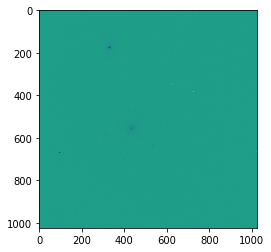

In [48]:
StarformM51 = fits.getdata(calibrated_m51h) - fits.getdata(calibrated_m51r)
plt.imshow(StarformM51)

In [49]:
hdu = fits.PrimaryHDU(StarformM51)
fits.writeto('StarformM51.fits',StarformM51, overwrite = True)

In [50]:
M81u = glob.glob('/users/allyw/Astro 480/ResearchProject/M 81_sdss_u_20190501_063746.fits')
M81g = glob.glob('/users/allyw/Astro 480/ResearchProject/M 81_sdss_g_20190501_062204.fits')
M81r = glob.glob('/users/allyw/Astro 480/ResearchProject/M 81_sdss_r_20190501_061629.fits')

In [51]:
for M81r_file in M81r:
    calibrated_m81r = M81r_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M81r_file) - master_bias)/(np.median(r_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M81r_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m81r, overwrite=True)

In [52]:
for M81g_file in M81g:
    calibrated_m81g = M81g_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M81g_file) - master_bias)/(np.median(g_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M81g_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m81g, overwrite=True)

In [53]:
for M81u_file in M81u:
    calibrated_m81u = M81u_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M81u_file) - master_bias)/(np.median(u_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M81u_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m81u, overwrite=True)

In [54]:
ICh = glob.glob('/users/allyw/Astro 480/ResearchProject/IC4665_halpha_20190502_073750.fits')
ICu = glob.glob('/users/allyw/Astro 480/ResearchProject/IC4665_sdss_u_20190502_080308.fits')
ICg = glob.glob('/users/allyw/Astro 480/ResearchProject/IC4665_sdss_g_20190502_074659.fits')
ICr = glob.glob('/users/allyw/Astro 480/ResearchProject/IC4665_sdss_r_20190502_075935.fits')

In [59]:
for ICr_file in ICr:
    calibrated_icr = ICr_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(ICr_file) - master_bias)/(np.median(r_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(ICr_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_icr, overwrite=True)

In [61]:
for ICg_file in ICg:
    calibrated_icg = ICg_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(ICg_file) - master_bias)/(np.median(g_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(ICg_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_icg, overwrite=True)

In [62]:
for ICu_file in ICu:
    calibrated_icu = ICu_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(ICu_file) - master_bias)/(np.median(u_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(ICu_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_icu, overwrite=True)

In [63]:
for ICh_file in ICh:
    calibrated_ich = ICh_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(ICh_file) - master_bias)/(np.median(h_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(ICh_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_ich, overwrite=True)

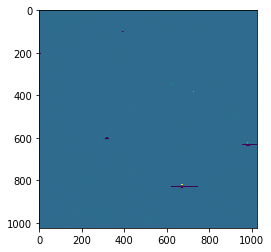

In [64]:
StarformIC = fits.getdata(calibrated_ich) - fits.getdata(calibrated_icr)
plt.imshow(StarformIC)

In [65]:
hdu = fits.PrimaryHDU(StarformIC)
fits.writeto('StarformIC.fits',StarformIC, overwrite = True)

In [66]:
#M105h = glob.glob('/users/allyw/Astro 480/ResearchProject/IC4665_halpha_20190502_073750.fits')
M105u = glob.glob('/users/allyw/Astro 480/ResearchProject/M105_sdss_u_20190502_031617.fits')
M105g = glob.glob('/users/allyw/Astro 480/ResearchProject/M105_sdss_g_20190502_033356.fits')
M105r = glob.glob('/users/allyw/Astro 480/ResearchProject/M105_sdss_r_20190502_030800.fits')

In [67]:
for M105r_file in M105r:
    calibrated_m105r = M105r_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M105r_file) - master_bias)/(np.median(r_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M105r_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m105r, overwrite=True)

In [68]:
for M105g_file in M105g:
    calibrated_m105g = M105g_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M105g_file) - master_bias)/(np.median(g_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M105g_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m105g, overwrite=True)

In [69]:
for M105u_file in M105u:
    calibrated_m105u = M105u_file.replace('.fits','_cal.fits') # this just adds "cal" to the end of the file name
    image_data = (fits.getdata(M105u_file) - master_bias)/(np.median(u_flat_list))
    hdu = fits.PrimaryHDU(image_data)
    hdu.header = fits.getheader(M105u_file)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(calibrated_m105u, overwrite=True)